# Final Exam - Group Portion (Introduction & Warm-up)
### Data Science for Biology
**Notebook developed by:**  *Max Staller*, *Kinsey Long*<br>

### Academic Integrity Section from the Syllabus 
Text from the syllabus
**Academic Integrity**
Please take a moment to review the University Honor Code: <br>
“As a member of the UC Berkeley community, I act with honesty, integrity, and respect for others.” <br>
-https://teaching.berkeley.edu/berkeley-honor-code <br>
You are a member of an academic community at one of the world’s leading research universities. Universities like Berkeley create knowledge that has a lasting impact in the world of ideas and on the lives of others; such knowledge can come from an undergraduate paper as well as the lab of an internationally known professor.  One of the most important values of an academic community is the balance between the free flow of ideas and the respect for the intellectual property of others. Researchers don't use one another's research without permission; scholars and students always use proper citations in papers; professors may not circulate or publish student papers without the writer's permission; and students may not circulate or post materials (handouts, exams, syllabi--any class materials) from their classes without the written permission of the instructor. <br>
Any test, paper or report submitted by you and that bears your name is presumed to be your own original work that has not previously been submitted for credit in another course unless you obtain prior written approval to do so from your instructor. In all of your assignments, including your homework or drafts of papers, you may use words or ideas written by other individuals in publications, web sites, or other sources, but only with proper attribution. If you are not clear about the expectations for completing an assignment or taking a test or examination, be sure to seek clarification from your instructor or GSI beforehand. Finally, you should keep in mind that as a member of the campus community, you are expected to demonstrate integrity in all of your academic endeavors and will be evaluated on your own merits. The consequences of cheating and academic dishonesty—including a formal discipline file, possible loss of future internship, scholarship, or employment opportunities, and denial of admission to graduate school—are simply not worth it. <br>
Collaboration and Independence: Reviewing lecture and reading materials and studying for exams can be enjoyable and enriching things to do together with one’s fellow students. We recommend this. However, homework assignments should be completed independently and materials turned in as homework should be the result of one’s own independent work. Some assignments, namely the preparation for the debate arguments, are meant to be done together in a group. <br>
Cheating: Anyone caught cheating on a quiz or exam will receive a failing grade and will also be reported to the University Office of Student Conduct. In order to guarantee that you are not suspected of cheating, please keep your eyes on your own materials and do not converse with others during the quizzes and exams. <br>
Plagiarism/Self-plagiarism: You must be original in composing the writing assignments in this class. To copy text or ideas from another source (including your own previously, or concurrently, submitted course work) without appropriate reference is plagiarism and will result in a failing grade for your assignment and usually further disciplinary action. For additional information on plagiarism, self-plagiarism, and how to avoid it, see, for example: <br>
http://www.lib.berkeley.edu/instruct/guides/citations.html#Plagiarism (link is external) <br>
http://gsi.berkeley.edu/teachingguide/misconduct/prevent-plag.html (link is external) <br>

Academic Integrity and Ethics: Cheating on exams and plagiarism are examples of violations in the realm of ethics and integrity. Honesty, integrity, and ethical behavior are of great importance in all facets of life. They are so important that it is generally assumed that one has learned and internalized these qualities at an early age. As a result, these issues rarely get explicitly addressed by the time one gets to be a university student. However, it cannot be overstated just how important honesty is to the academic enterprise. <br>
Turnitin: UC Berkeley's honor code states "As a member of the UC Berkeley community, I act with honesty, integrity, and respect for others." As a tool to promote academic integrity in this course, written work submitted via bCourses may be checked for originality using Turnitin. Turnitin compares student work to a database of books, journal articles, websites, and other student papers. This creates an opportunity for students to improve their academic writing skills, by ensuring that other sources have been properly cited and attributed. For more information about Turnitin at UC Berkeley, visit: 
http://ets.berkeley.edu/academic-integrity (link is external). <br>
Policy on Academic Dishonesty/Berkeley Campus Code of Student Conduct (link is external) <br>
Resources on promoting Academic Integrity (link is external) <br>
 
Agreement: Entering your name on quizzes, lab assignments, and projects will be interpreted as conclusive agreement to the assertion that “On my honor, I have neither given nor received inappropriate assistance in the completion of this exam or problem set.” <br>


### Group Project
We expect you to work together. You may divide up the steps of the analysis and perform those subparts individually or in pairs or trios. For each code module, clearly indicate which group members contributed. For each figure, in the paragraph after the figure indicate which team members contributed. 

You will submit one report document. You will submit one PDF containing all the code, but you are welcome to develop the code in many separate documents.

We want everyone to make both intellectual contributions and coding contributions. Coding contributions are writing code to perform a filter or analysis or create a plot. Intellectual contributions are deciding what filters to apply, what analyzes to perform, or how to plot the data. 

**As the last portion of the project, you will hand write and sign the following statement, take a picture of it and upload it as part of your individual project submission.**
“I pledge my honor, I have made intellectual and coding contributions to this group project. My contributions are accurately annotated next to each figure. [sign your name. Date]”



In [36]:
#Just run this cell
!pip install seaborn==0.13.2

from datascience import *
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
plt.style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('fivethirtyeight')


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Group Project Data Introduction

Eukaryotic transcription factors (TFs) control transcription with DNA binding domains and effector domains. DNA binding domains (DBDs) are structured and conserved domains that bind to a family of related DNA sequences. Structure and conservation power profile Hidden Markov Models (HMMs) accurately predict DBDs from amino acid sequence ([Finn et al. 2016](https://paperpile.com/c/tx7aLV/Xg1N)). Outside of folded DBDs, TFs contain long intrinsically disordered regions (IDRs) that do not fold into a single 3D structure and inhabit a dynamic ensemble of conformations ([Lee et al. 2014; Liu et al. 2006](https://paperpile.com/c/tx7aLV/VN8Q+kfBN)). The IDRs of TFs contain effector domains like repression domains that bind to co-repressor complexes and activation domains (ADs) that bind to coactivator complexes ([Dyson and Wright 2016](https://paperpile.com/c/tx7aLV/Q7vX)). ADs are poorly conserved and intrinsically disordered, which has made them difficult to predict for protein sequence ([Staller et al. 2018](https://paperpile.com/c/tx7aLV/MYky)). Until very recently, when we sequenced a genome, we could readily predict TFs but struggled to predict which TFs were activators or repressors. 
We have assembled an unpublished dataset from the Staller Lab. The Staller Lab studies the protein sequence features that control the function of transcriptional activation domains. This dataset uses the sequence diversity of TF orthologs to probe the sequence features that control activation domain function. As a starting point, we used the *S. cerevisiae* transcription factor, Gcn4, a well studied model system. 


**Source of the sequences:** <br>
Critically in this dataset, we synthesized and measured the function of 40 amino acid protein fragments that we call Tiles. Every Tile is 40 amino acids. They are offset by 5 amino acids. 
We computationally screened for orthologs of *S. cerevisiae* Gcn4. We used two criteria: the bZIP DNA binding domain (IPR004827) and the regular expression Wx[SPA]LF for the WxxLF motif. We scanned 207 diverse proteomes from the Mycosm database [ref]. This computational screen yielded 1188 proteins from 129 genomes, resulting in 502 unique proteins. Of these, >99% were reciprocal Blast best hits with *S. cerevisiae* Gcn4. <br>
We took the 502 unique protein sequences and computationally chopped them into 40 AA tiles spaced every 5 AA (e.g. 1-40, 6-45, 11-50 etc.). As a result, if two closely related sequences contain insertions that change the phasing, a single tile can map to multiple full length orthologs. We removed duplicate tile sequences, yielding 20679 unique tiles. We added 52 control sequences, located at the end of the DataFrame. <br>
We reverse translated tile sequences using *S. cerevisiae* preferred codons, creating the ‘ActivationDomainDNAseq’ column. We added primer sequences for PCR amplification and HiFi cloning. The resulting oligo pool was ordered from Agilent Technologies. These oligos were cloned into a plasmid backbone. The resulting plasmid library was integrated into *S. cerevisiae* and activity measured by fluorescence activated cell sorting (Staller et al. 2018). This assay will be described in detail in class. <br>

**Progress so far** <br>
We have made substantial progress understanding the sequence features that control activity in one environmental condition, Synthetic Complete Media with Glucose (SC Glucose). Glucose is the preferred carbon source for *S. cerevisiae*. SC has all 20 amino acids and many nucleotides included. It is inbetween a rich media (YPD) and a minimal media (Synthetic Dextrose). 

**Goals for your final project** <br>
In this final project, we want you to analyze 7 additional experimental conditions. We have performed very little analysis on these additional conditions. Our goal is for your groups to explore this dataset and find new relationships between sequence and function.

All the measurements:
- `Activity_SCglucose` = measured activation domain activity in SC+glucose media. Sorted on the GFP/mCherry Ratio (baseline measurement)
- `Activity_BioRepA` = This is the activity measurement of biological replicate A. Sorted on the GFP/mCherry Ratio
- `Activity_BioRepB` =This is the activity measurement of biological replicate B. Sorted on the GFP/mCherry Ratio
- `Activity_SCglucose` is derived from 'Activity_BioRepA' and 'Activity_BioRepB'
- `Activity_SCgalactose` = measured activation domain activity in SC+galactose media. Sorted on the GFP/mCherry Ratio
- `Activity_P3promoter`   = The full library was remated to reporter. This sample is a technical replicate of Activity_SCglucose
- `Activity_P14promoter` = Ratio Sort using the P14 promoter
- `Activity_P15promoter` = Ratio Sort using the P15 promoter
- `Activity_P3promoterMig1TFBSremoved` = Ratio Sort using a variant of the P3 promoter where the Mig1 repressor binding site was removed.
- `GFPsortSignal_BioRepA` = Pool A, sorted on GFP only. Activity uncorrected for protein abundance.
- `GFPsortSignal_BioRepB` = Pool B, sorted on GFP only. Activity uncorrected for protein abundance.
- `mCherrysortSignal_BioRepA` = Pool A, sorted on mCherry only. Protein abundance
- `mCherrysortSingal_BioRepB` = Pool B, sorted on mCherry only. Protein abundance
- `numreads_per_AD_7AGFP_AAS` = Pool A, GFP sort, Amino acid starvation ReadCount
- `Activity_7AGFP_AAS` = Pool A, GFP sort, Amino acid starvation Activity - Activity
- `numreads_per_AD_8AmCh_AAS` = Pool A, mCherry sort, Amino acid starvation ReadCount
- `Activity_8AmCh_AAS` = Pool A, mCherry sort, Amino acid starvation - protein abundance
- `numreads_per_AD_9ARatio_AAS` = Pool A, Ratio sort, Amino acid starvation ReadCount
- `Activity_9ARatio_AAS` = Pool A, Ratio sort, Amino acid starvation - Activity
- `numreads_per_AD_10BRatio_AAS`  =Pool B, Ratio sort, Amino acid starvation ReadCount
- `Activity_10BRatio_AAS` = Pool B, Ratio sort, Amino acid starvation - Activity


Each of the activity measurements (Ratio, GFP, or mCherry) has an associated column that contains the number of sequencing reads used to compute activity. In general, Tiles with more sequencing reads are better measured than Tiles with very few sequencing reads. In your initial exploration of the data, you may discover that it is useful to impose a threshold number of sequencing reads, and remove Tiles with very few reads from later analyses. <br>

**Research goals:** <br>
Identify changes in activity across experimental conditions <br>
Which tiles change activity? Which tiles have constant activity? <br>
Identify protein sequence features that can explain condition specific activity. <br>
Apply what you have learned in class to the sequence-to-function relationship <br>


---
### Warm-up for Data Exploration

These warm-up exercises are preliminary analyses on the dataset to help you develop the bigger group project later. All of the autograder tests for these warm-ups are public. The warm-up section only accounts for 3% of the Group Final grade.

In [37]:
#Just run this cell
arraydata = pd.read_csv("./data/gcn4-orthologs.csv")
arraydata.head()

,Unnamed: 0,DNAseq,ADseq,numreads_per_AD_7AGFP_AAS,Activity_7AGFP_AAS,numreads_per_AD_8AmCh_AAS,Activity_8AmCh_AAS,numreads_per_AD_9ARatio_AAS,Activity_9ARatio_AAS,numreads_per_AD_10BRatio_AAS,...,Activity_BYS4_BioRepAverage,Stdev_BYS4_BioReps,Activity_SCglucose,Start,Recovered,Activity_SCgalactose,Activity_P3promoter,Activity_P14promoter,Activity_P15promoter,Activity_P3promoterMig1TFBSremoved
0,0,AAAAATTCTAGATTTGTTTCTTTGATGCAAGGATTCTCTGATGGTT...,KNSRFVSLMQGFSDGSKDIIDNEVREVGDFSVNKPPQADD,NaN,NaN,NaN,NaN,NaN,NaN,3151.0,...,NaN,NaN,11666.48682,341,True,97250.68362,NaN,11149.49032,NaN,8040.343648
1,1,AAAAATTCTCCATCTGGTTTGGCTCATTCTTCTGTTTCTGGTGTTG...,KNSPSGLAHSSVSGVGKSRRRKGPLPPITVQDPSDKTAIK,942.0,709.606092,367.0,2921.917252,601.0,22242.74698,6909.0,...,21968.05843,5849.143385,21968.05843,146,True,15516.96245,14570.13217,16872.28649,11555.08411,10255.296840
2,2,AAACAAAATTCTCAAGTTGATCAATCTCCATTGTTGCCAGAAGAAG...,KQNSQVDQSPLLPEEELEVSEHLRRRRSGTATSPPAGGVR,NaN,NaN,NaN,NaN,NaN,NaN,6577.0,...,NaN,NaN,21203.02478,326,True,0.00000,18274.98241,15702.60901,18303.29201,17265.783330
3,3,AAACAAAGAGCTACTCCATTGACTCCAGTTGTTCCAGAATCTGATG...,KQRATPLTPVVPESDDPVALKRARNTEAARRSRARKLERM,357.0,1039.469842,342.0,1089.428196,450.0,74251.36241,NaN,...,NaN,NaN,47244.41248,246,True,92844.00000,NaN,NaN,NaN,84807.518160
4,4,AAACAAAGATCTATTCCATTGTCTCCAATTGTTCCAGAATCTTCTG...,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,539.0,1081.980998,627.0,622.131501,586.0,58872.95132,128.0,...,95093.69451,13292.686710,95093.69451,211,True,76399.62949,NaN,125056.17980,129302.35080,100360.735500


<font color = #d14d0f>**QUESTION 1**:</font> Figure out how the `"Activity_SCglucose"` column is calculated from the 2 biological replicates, `​"​Activity_BioRepA_BYS4"` and `"Activity_BioRepB_BYS4"` (1 point)

In [38]:
# YOUR CODE
columns = ["Activity_SCglucose", "Activity_BioRepA_BYS4", "Activity_BioRepB_BYS4"]
arraydata[columns]

,Activity_SCglucose,Activity_BioRepA_BYS4,Activity_BioRepB_BYS4
0,11666.48682,NaN,11666.48682
1,21968.05843,26104.02738,17832.08948
2,21203.02478,NaN,21203.02478
3,47244.41248,47244.41248,NaN
4,95093.69451,85694.34560,104493.04340
...,...,...,...
19033,69782.11107,84806.86916,54757.35299
19034,79342.19871,136037.59740,22646.80001
19035,157312.61460,157312.61460,NaN
19036,60167.66838,57407.61053,62927.72623


**Answer:** The `Activity_SCglucose` column is calculated by taking the average of the `Activity_BioRepA_BYS4` and the `Activity_BioRepB_BYS4`. In the case that one of the columns are missing, we just take the value of the column with a value for `Activity_SCglucose`

<font color = #d14d0f>**QUESTION 2**:</font> Create a new DataFrame `charges` which has one column `"charge"` that contains to the net charge of each Tile (assume K = +1, R = +1, D = -1, pH = 7, and E = -1). It should be indexed by `"ADseq"`. (2 points)

In [39]:
# YOUR CODE
def charge(string):
    """
    This function takes a string and returns the charge of the protein.
    """
    charge_dict = {
        "K": 1,
        "R": 1,
        "D": -1,
        "E": -1,
    }

    net_charge = 0
    for amino_acid in string:
        if amino_acid in charge_dict:
            net_charge += charge_dict[amino_acid]
        else:
            net_charge += 0

    return net_charge

charges = arraydata[["ADseq"]].copy()
charges["charge"] = arraydata["ADseq"].apply(charge)

charges.head()

,ADseq,charge
0,KNSRFVSLMQGFSDGSKDIIDNEVREVGDFSVNKPPQADD,-3
1,KNSPSGLAHSSVSGVGKSRRRKGPLPPITVQDPSDKTAIK,6
2,KQNSQVDQSPLLPEEELEVSEHLRRRRSGTATSPPAGGVR,0
3,KQRATPLTPVVPESDDPVALKRARNTEAARRSRARKLERM,6
4,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,8


<font color = #d14d0f>**QUESTION 3**:</font> Create a DataFrame `aa_counts_df` that is indexed by each tile sequence (`"ADseq"`), and has a column for each amino acid letter, corresponding to that amino acid count in the tile sequence. (3 points)

In [40]:
# YOUR CODE
def aa_count(sequence):
    # First let's build a dictionary of amino acids
    amino_acids = {}

    # Loop through the sequence and count the occurrences of each amino acid
    for aa in sequence:
        if aa in amino_acids:
            amino_acids[aa] += 1
        else:
            amino_acids[aa] = 1
    return amino_acids

aa_counts_df = arraydata["ADseq"].apply(aa_count)
aa_counts_df = pd.DataFrame(aa_counts_df.tolist())
aa_counts_df = aa_counts_df.fillna(0)
aa_counts_df = aa_counts_df.astype(int)

# now we do a horizontal concatenation
aa_counts_df = pd.concat([arraydata["ADseq"], aa_counts_df], axis=1)
aa_counts_df

,ADseq,K,N,S,R,F,V,L,M,Q,...,D,I,E,P,A,H,T,Y,W,C
0,KNSRFVSLMQGFSDGSKDIIDNEVREVGDFSVNKPPQADD,3,3,5,2,3,4,1,1,2,...,6,2,2,2,1,0,0,0,0,0
1,KNSPSGLAHSSVSGVGKSRRRKGPLPPITVQDPSDKTAIK,5,1,7,3,0,3,2,0,1,...,2,2,0,5,2,1,2,0,0,0
2,KQNSQVDQSPLLPEEELEVSEHLRRRRSGTATSPPAGGVR,1,1,5,5,0,3,4,0,3,...,1,0,5,4,2,1,2,0,0,0
3,KQRATPLTPVVPESDDPVALKRARNTEAARRSRARKLERM,3,1,2,8,0,3,3,1,1,...,2,0,3,4,6,0,3,0,0,0
4,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,3,1,5,8,0,1,3,1,2,...,1,2,2,4,6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19033,FVGNNRDLDHALSGDPWYPLFPQEDQEQSNNVDNSPLLPE,0,5,3,1,2,2,5,0,3,...,5,0,3,5,1,1,0,1,1,0
19034,FVGNNGDIDQALAGDPWYPLFPQDDQLESSNVEQSPLLPE,0,3,3,0,2,2,5,0,4,...,5,1,3,5,2,0,0,1,1,0
19035,FVGDGDLDQSLAADPWYPLFPESDKLDQPTKVEQSPLIID,2,0,3,0,2,2,5,0,3,...,7,2,2,5,2,0,1,1,1,0
19036,FVVSRSPAAVHIACCTGLSGLGSITRRIDYNHLATLFIYA,0,1,4,3,2,3,4,0,0,...,1,4,0,1,5,2,3,2,0,2


<font color = #d14d0f>**QUESTION 4**:</font> Create a DataFrame `motifs_counts_df` that is indexed by each tile sequence (`"ADseq"`), and has a column for each motif in `motif_list`, corresponding to the number of occurances of that motif. The motifs in `motif_list` correspond to regex patterns. (3 points)
> e.g the pattern `"[DE].[WFY]"` means it will match a sequence with D or E, any amino acid, then W, F, or Y. That motif would match with "DAW", "EMF", "DYY" and so on.

In [41]:
motif_list = [
    "W..LF",
    "[WFYL]..[WFYL][WFYL]",
    "[WFL]..[WFL][WFL]",
    "[DE][WFY]",
    "[DE][WF]",
    "[DE][L]",
    "[DE].[WFY]",
    "[DE]..[WFY]",
    "FF",
    "F.F",
    "F..F",
    "[FY].....[FY]",
    "SP",
    "[WFYL]...[WFYL][WFYL]"
]

# YOUR CODE
def motif_count(sequence):
    """
    This function takes a sequence and returns the count of each motif in the sequence.
    """
    motif_counts = {}
    for motif in motif_list:
        # Use regex to find all occurrences of the motif in the sequence
        matches = re.findall(motif, sequence)
        # Count the number of matches
        motif_counts[motif] = len(matches)
    return motif_counts

motif_counts_df = arraydata["ADseq"].apply(motif_count)
motif_counts_df = pd.DataFrame(motif_counts_df.tolist())
motif_counts_df = motif_counts_df.fillna(0)
motif_counts_df = motif_counts_df.astype(int)
# now we do a horizontal concatenation
motif_counts_df = pd.concat([arraydata["ADseq"], motif_counts_df], axis=1)
motif_counts_df.head()


,ADseq,W..LF,[WFYL]..[WFYL][WFYL],[WFL]..[WFL][WFL],[DE][WFY],[DE][WF],[DE][L],[DE].[WFY],[DE]..[WFY],FF,F.F,F..F,[FY].....[FY],SP,[WFYL]...[WFYL][WFYL]
0,KNSRFVSLMQGFSDGSKDIIDNEVREVGDFSVNKPPQADD,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,KNSPSGLAHSSVSGVGKSRRRKGPLPPITVQDPSDKTAIK,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,KQNSQVDQSPLLPEEELEVSEHLRRRRSGTATSPPAGGVR,0,0,0,0,0,1,0,0,0,0,0,0,2,0
3,KQRATPLTPVVPESDDPVALKRARNTEAARRSRARKLERM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,KQRSIPLSPIVPESSDPAALKRARNTEAARRSRARKLQRM,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<font color = #d14d0f>**QUESTION 5a**:</font> In question 5, you will look at the reproducibility of biological replicates. First, generate a summary of the entries. Create a DataFrame `q5a_entrysummary` which is has 4 columns: <br>
    - `"# measured in both BioReps"`: the number of tiles with data from both BioRepA and B <br>
    - `"# measured only in BioRep A"`: the number of tiles with only BioRepA data <br>
    - `"# measured only in BioRep B"`: the number of tiles with only BioRepB data <br>
    - `"# missing from both"`: the number of tiles with neither BioRepA or B data <br>
    - `# of tiles"`: the total number of tiles <br>

(2 points)

In [48]:
# BEGIN PROMPT
q5a_entrysummary = pd.DataFrame({
    "# measured in both BioReps": [],
    "# measured only in BioRep A": [],
    "# measured only in BioRep B": [],
    "# missing from both": [],
    "# of tiles": []
})

biorep_df = arraydata[["Activity_BioRepA_BYS4", "Activity_BioRepB_BYS4"]].copy()

# now iterrate throw the rows, and add to the df as necessar
for index, row in biorep_df.iterrows():
    # check if both are missing
    if pd.isna(row["Activity_BioRepA_BYS4"]) and pd.isna(row["Activity_BioRepB_BYS4"]):
        q5a_entrysummary.loc[index] = [0, 0, 0, 1, 1]
    # check if only one is missing
    elif pd.isna(row["Activity_BioRepA_BYS4"]) or pd.isna(row["Activity_BioRepB_BYS4"]):
        # figure out which one is missing
        if pd.isna(row["Activity_BioRepA_BYS4"]):
            # BioRep A is missing
            q5a_entrysummary.loc[index] = [0, 0, 1, 0, 1]
        else:
            # BioRep B is missing
            q5a_entrysummary.loc[index] = [0, 1, 0, 0, 1]
        
    # both are present
    else:
        q5a_entrysummary.loc[index] = [1, 0, 0, 0, 1]

# now we sum the columns for the description
q5a_entrysummary = q5a_entrysummary.sum()
q5a_entrysummary.to_frame().T

,# measured in both BioReps,# measured only in BioRep A,# measured only in BioRep B,# missing from both,# of tiles
0,10852,4177,3915,94,19038


<font color = #d14d0f>**QUESTION 5b**:</font> Generate a scatterplot for each of the following column pairs to look at how well the replicated trials correspond to each other. (2 points) <br>
    - `"Activity_BioRepA_BYS4"` vs `"Activity_BioRepB_BYS4"` <br>
    - `"GFPsortSignal_BioRepA"` vs `"GFPsortSignal_BioRepB"` <br>
    - `"Activity_SCglucose"` vs `"Activity_P3promoter"` (these are a special kind of replicate because the library was remated to the reporter) <br>
    - `"mCherrysortSignal_BioRepA"` vs `"mCherrysortSingal_BioRepB"` <br>

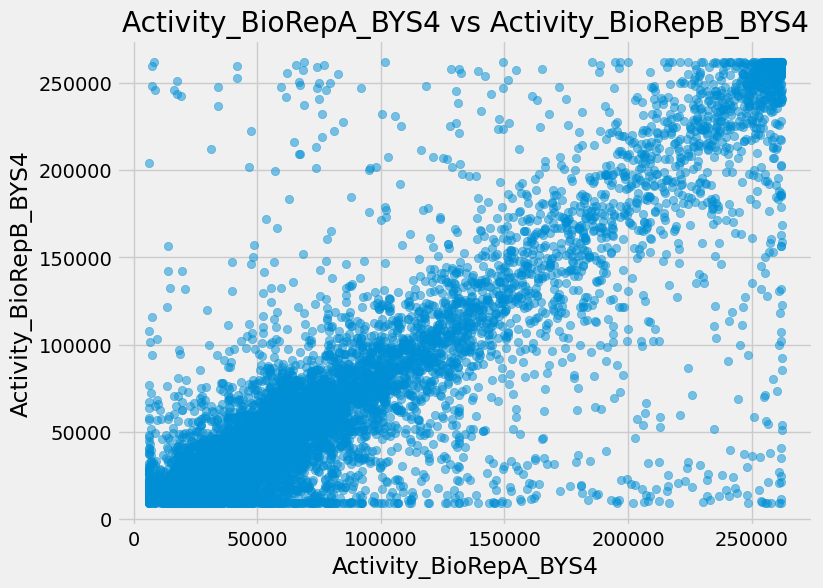

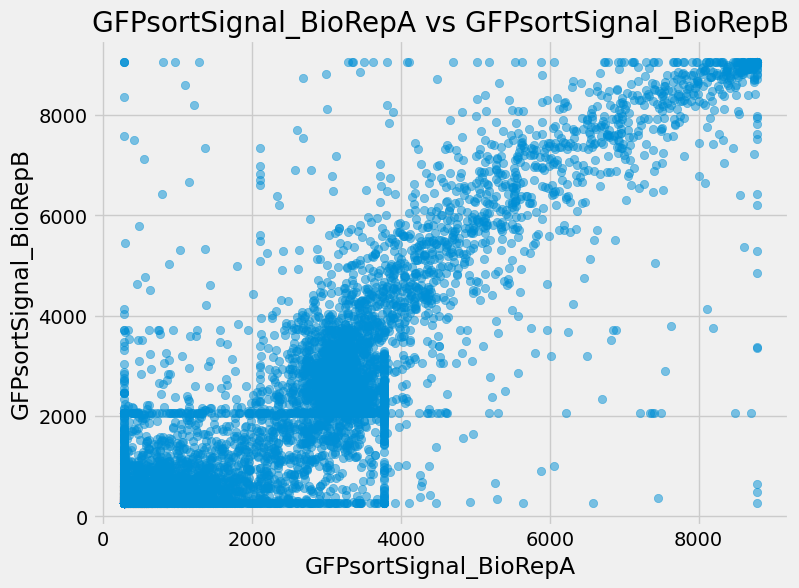

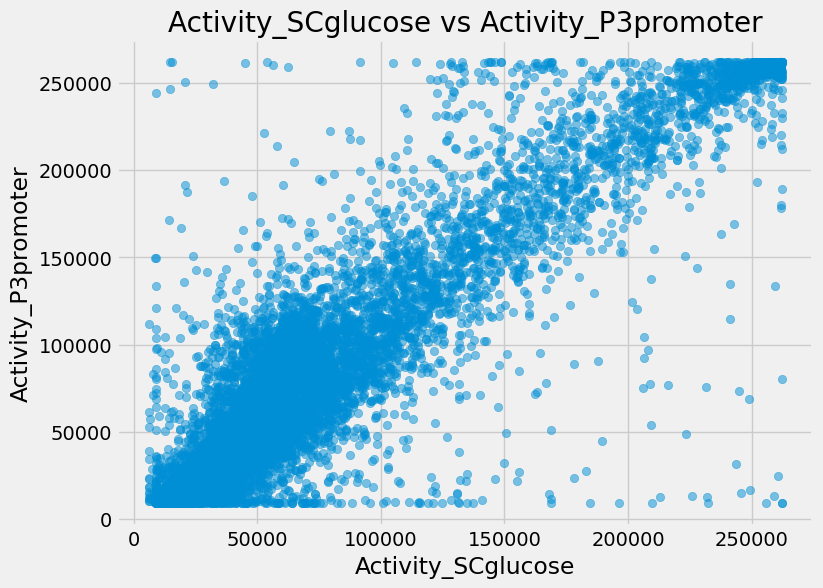

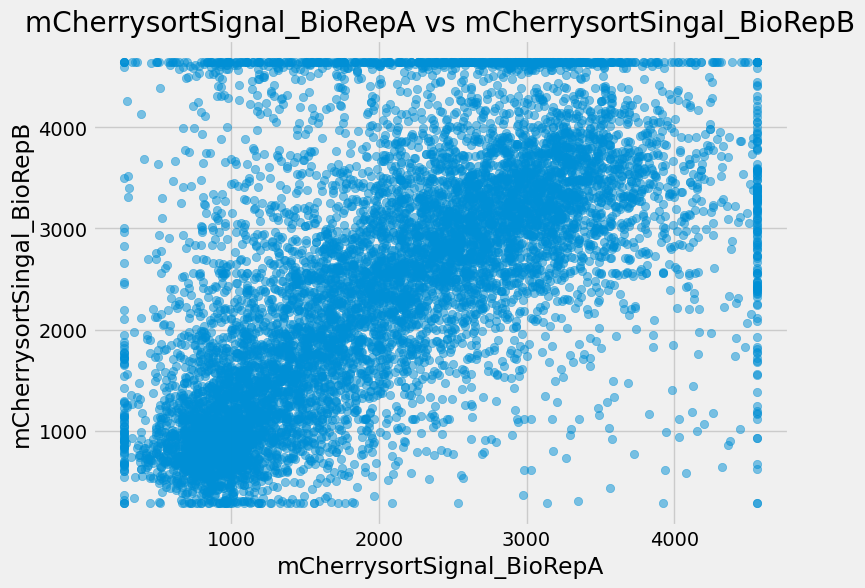

In [43]:
# YOUR CODE
plottingpairs = [
    ("Activity_BioRepA_BYS4", "Activity_BioRepB_BYS4"),
    ("GFPsortSignal_BioRepA", "GFPsortSignal_BioRepB"),
    ("Activity_SCglucose", "Activity_P3promoter"),
    ("mCherrysortSignal_BioRepA", "mCherrysortSingal_BioRepB"),
]

for pair in plottingpairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(arraydata[pair[0]], arraydata[pair[1]], alpha=0.5)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(True)
    plt.title(f"{pair[0]} vs {pair[1]}")
    plt.show()

<font color = #d14d0f>**QUESTION 5c**:</font> Build a function `plot_correlation_w_threshold(x, y, threshold)` that plots `x` vs `y`, but for only tiles that have more than `threshold` number of sequencing reads. It should also calculate the Pearson's correlation for that subset and the number of datapoints in that subset, which will be incorporated into the title. (4 points)

> - `plot_correlation_w_threshold("Activity_BioRepA_BYS4", "Activity_BioRepB_BYS4", 0)` should plot the first plot that you observed in Q4b. <br>
> - The `"TotalReads_BioRepA_BYS4"` and `"TotalReads_BioRepB_BYS4”` columns indicate the number of sequencing reads that go into the calculation of the activity measurement. 

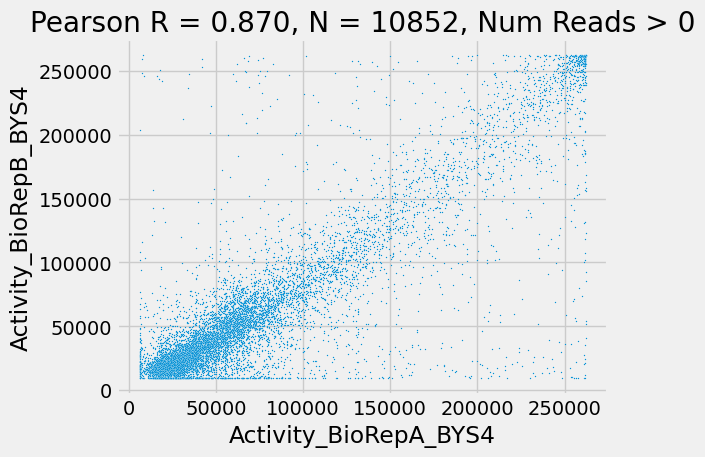

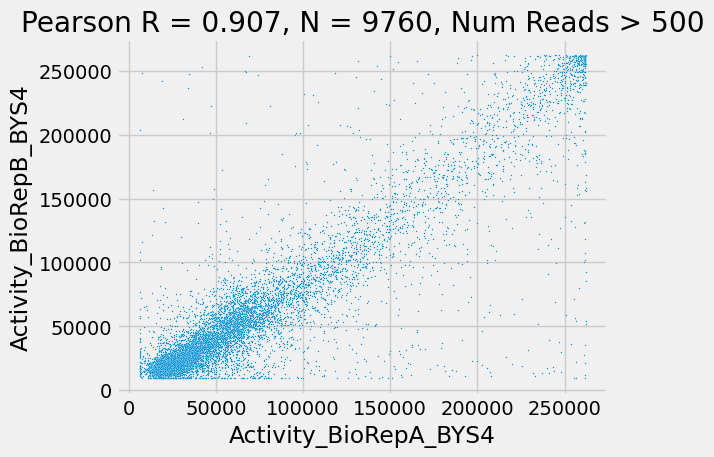

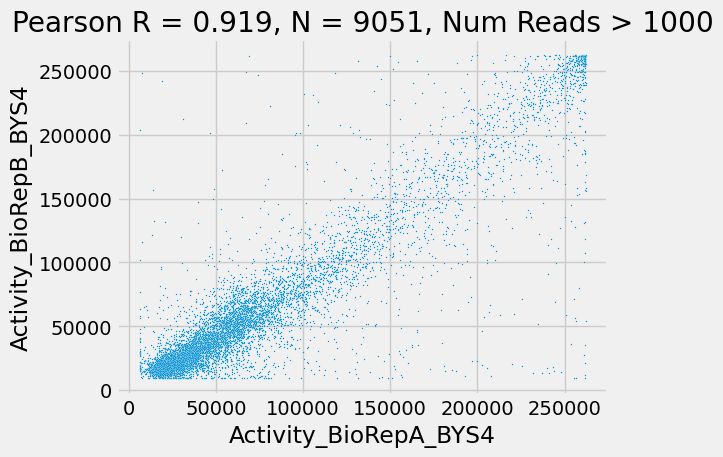

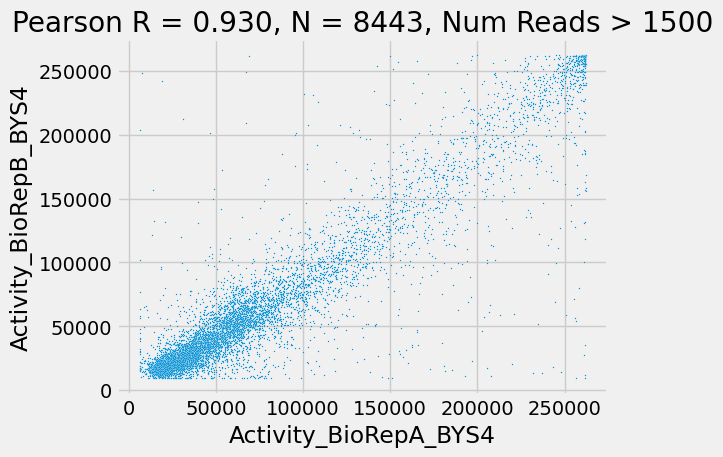

In [44]:
# YOUR CODE
def plot_correlation_w_threshold(x, y, threshold):
    above_threshold_df = arraydata[(arraydata["TotalReads_BioRepA_BYS4"] > threshold )&( arraydata["TotalReads_BioRepB_BYS4"] > threshold )]
    sns.scatterplot(data = above_threshold_df, x = x, y = y, s = 1)
    correlation = above_threshold_df[x].corr(above_threshold_df[y])
    num_datapoints = len(above_threshold_df)
    #Do not change the code below this line
    plt.title('Pearson R = %.3f, N = %i, Num Reads > %s' % (correlation, num_datapoints, threshold))
    plt.tight_layout()
    plt.show()

#Do not change this
for threshold in [0, 500, 1000, 1500]:
    plot_correlation_w_threshold("Activity_BioRepA_BYS4", "Activity_BioRepB_BYS4", threshold)

<font color = #d14d0f>**QUESTION 5c**:</font> Looking at the scatterplots in Q5c, how does reproducibility change if you impose a threshold for minimum number of sequencing reads? (1 point)

As we increase the thresfold for the minimum number of sequencing reads, the total number of data points considered decreases trivially. More interestingly though, the Pearson correlation coefficient increases which indicates improved reproducibility between biologial replicates. Perhaps this suggests that measurements based on higher read counts are more reliable which is likely due to reduced noise and variability at these higher read counts.

## Activity Histogram
Histogram activities were specified in the final project spec, and since we were not explicitly asked to do this above, I will add this plotting here.

In [45]:
import math

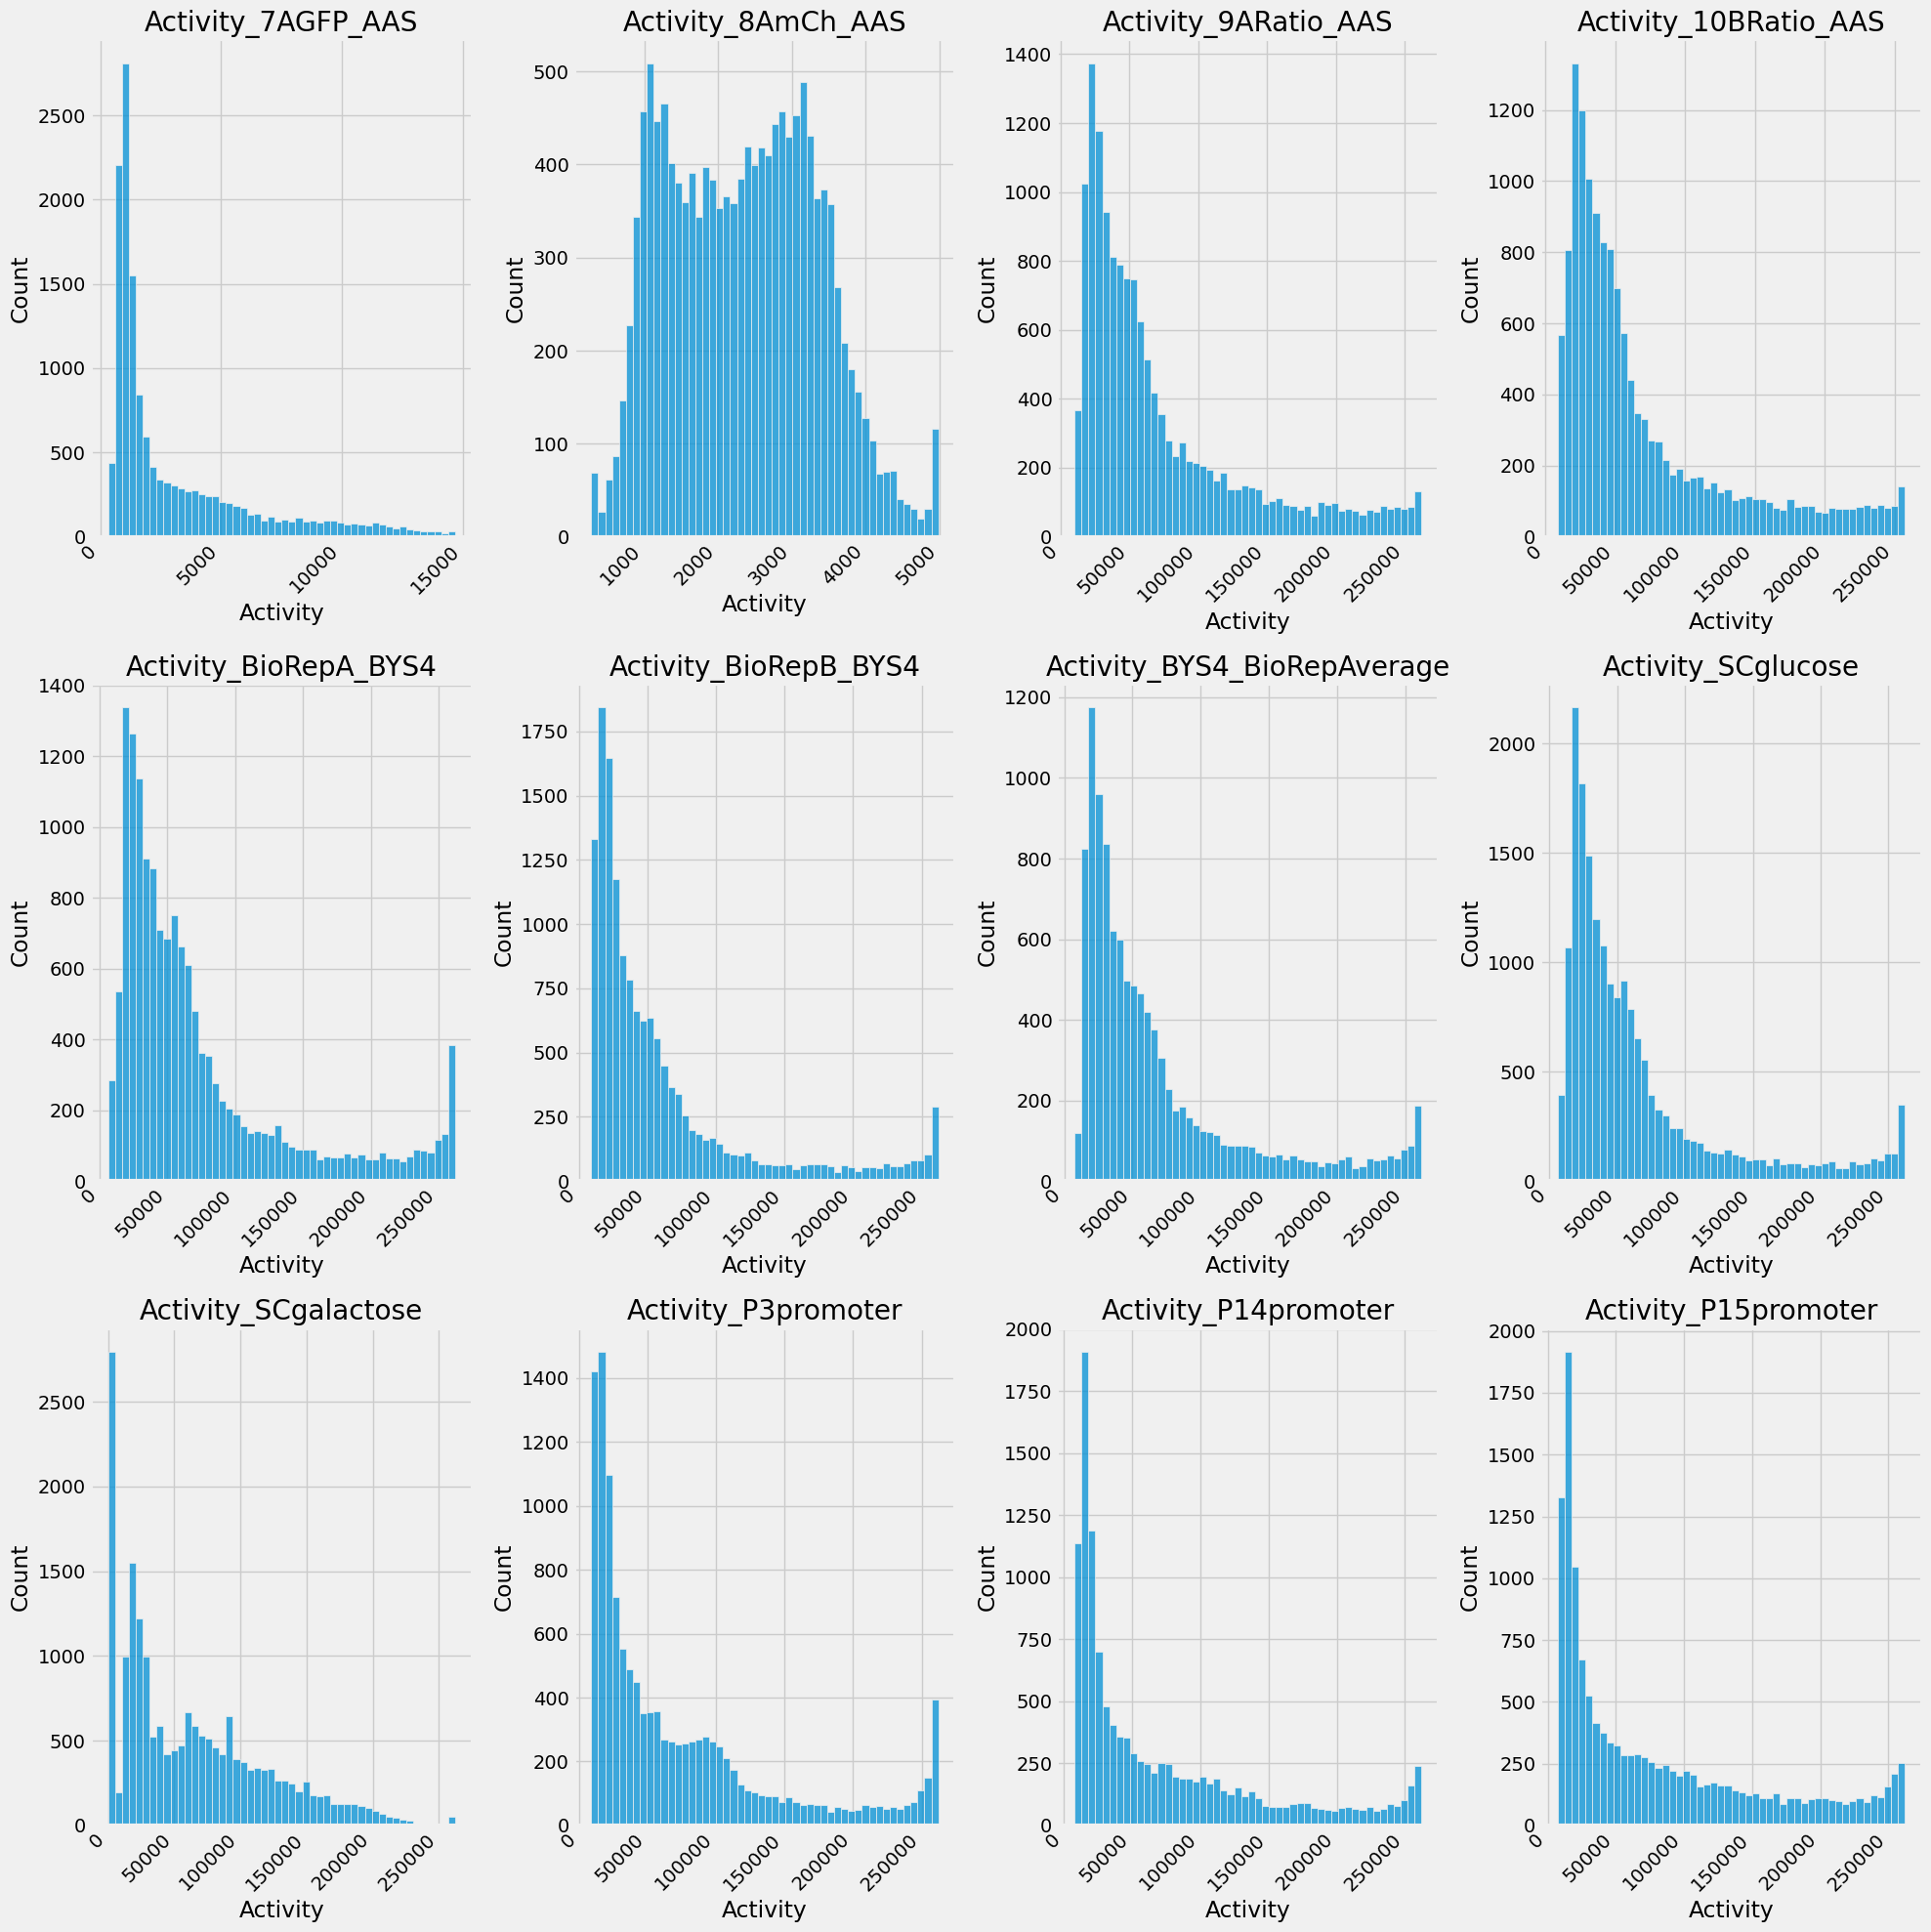

In [46]:
# first I will get all the activity columms
activity_columns = [col for col in arraydata.columns if "Activity" in col]
first_12 = activity_columns[:12]

# now for eacha ctivity I will plot a histogram in 4 rows, 4 columns
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(first_12):
    sns.histplot(arraydata[col], ax=axes[i], bins=50)
    axes[i].set_title(col)
    axes[i].set_xlabel("Activity")
    axes[i].set_ylabel("Count")
    axes[i].grid(True)
    # rotate the x-axis labels
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()

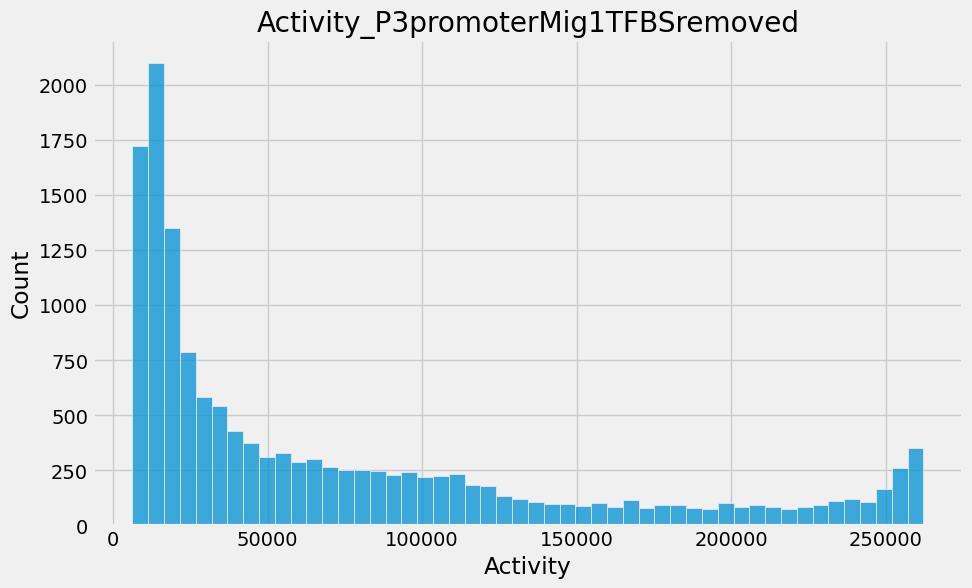

In [47]:
activity_last = activity_columns[-1]

# plot histogram of the last activity column
plt.figure(figsize=(10, 6))
sns.histplot(arraydata[activity_last], bins=50)
plt.title(activity_last)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.grid(True)
plt.show()